In [23]:
%load_ext autoreload
%matplotlib notebook
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import models.equilibr as eq
# import models.microAD as mad
import models.adsdesNonLin as ad
import models.adsdesLin as adl
import models.equilibrCopy1 as eq1
import models.equilibrCopy2 as eq2
import models.equilibrCopy3 as eq3
# import models.equilibrCopy3CuPy as eq3cupy
import models.prototypes as pt
import models.Ansol as an
import models.SurfBar as sb
import models.SurfBarKnudHop as skn
import models.SurfBarKnudHopMultiP as sknp
import models.SurfBarKnudHopJobLib as sknjl
import models.SurfBarMultiP as sbp
# from models.prototypes import universal_3Z
import models.SurfBarNumba as sbnu

In [26]:
opts={}
D1 = 1
D2 = 1 
pars=[1, 1]
opts['length'] = np.array([0, 0.001, 0.999, 1])     # List of zone lengths, m 
opts['porosity'] = 0.4                       # List of zone porosities
opts['Surface per weight'] = 1                   # Surface-to-weight ratio for the microporous particles, m2/kg
opts['AS concentration'] = 1
opts['cross_section'] = 1
opts['T'] = 298.15
opts['Tref'] = 298.15
opts['Np'] = 1
opts['Mref'] = 36
opts['M'] = 36
opts['micropore_Rp'] = 10                      # Characteristic length of micropore diffusion, m
opts['dr'] = 0.1
opts['Mircoporous porosity within particle'] = 0.5
opts['Sample mass'] = 1
opts['Dref zones'] = [D1, D2, D1]



In [27]:
D1=np.exp(-5)
D2=np.exp(-8)
ka = 100
kd = 1000
Dp = 1e-10
k_ent = 10
k_ext = 1000
ka_int = 100
kd_int = 1000
opts={}
# pars=[ka, kd]
pars=[ka, kd, k_ent, k_ext, ka_int, kd_int, Dp]
opts['length'] = np.array([0.0232, 0.002, 0.0232])     # List of zone lengths, m 
opts['porosity'] = 0.4                       # List of zone porosities
opts['microporosity'] = 0.4
opts['Surface per weight'] = 33 * 1000                  # Surface-to-weight ratio for the microporous particles, m2/kg
opts['AS concentration'] = 0.29  # Concentration of active cites mol/kg
opts['AS concentration within particle'] = 0.1
opts['cross_section'] = 1.26e-5
opts['T'] = 273+300
opts['Tref'] = 298.15
opts['Np'] = 1e-9
opts['Mref'] = 19.9
opts['M'] = 40.9
opts['micropore_Rp'] = 1.75e-6 / 2                      # Characteristic length of micropore diffusion, m
opts['dr'] = opts['micropore_Rp'] / 100
opts['Unit-layer thickness'] = 1e-9

opts['Sample mass'] = 16.4e-6                            # catalyst weight, kg
opts['Dref zones'] = [D1, D2, D1]
opts['Surface adsorption/desorption constants'] = [ka, kd]

In [48]:

sim_data_num = sb.pulse(pars=pars, opts=opts, T=1, dt=0.001, Nx=2000,  save_plot=False, 
                show_plot=False, pore_plot=False, surface_plot=False, plot_update = False)


[0.     0.0232 0.0252 0.0484]
35793650.79365077


KeyboardInterrupt: 

In [34]:
np.arange(9)*np.arange(9)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [32]:
datf = adl.pulse(pars=pars, opts=opts, T=4, dt=0.001, Nx=1000,  save_plot=False, show_plot=False)

0.00019675314912314916 0.0023969440509421544
100 1000
222.03548085901022


In [37]:
dfex = an.pulse(pars=pars, opts=opts, model='rev_ads', T=4, dt=0.001, Nx=1000)

0.0023969440509421544
100 1000
Sv*As*(1-eps) =  7.671957671957671


In [32]:
%matplotlib notebook
%matplotlib inline 
datf = eq3.pulse(pars=pars, opts=opts, T=1, dt=0.001, Nx=1000,  save_plot=False, show_plot=True, pore_plot=True)

AssertionError: 

In [32]:
sim_data_TM = pt.pulse(pars=pars, opts=opts, model = 'surf_bar_full', T=5, dt=0.001)

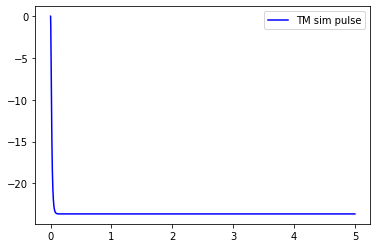

In [33]:
%matplotlib notebook
%matplotlib inline 
plt.plot(sim_data_TM[0], sim_data_TM[1], 'b-', label = 'TM sim pulse')
# plt.plot(sim_data_num['time'], sim_data_num['Flow']/1e-9, 'r-', label = 'Numerical sim pulse')
plt.legend()
plt.show()

3996


,time,Flow,iterations per step
0,0.000,0.000000e+00,0
1,0.001,5.610405e-12,5
2,0.002,3.237408e-11,5
3,0.003,1.012112e-10,5
4,0.004,2.285812e-10,5
...,...,...,...
996,0.996,4.870693e-11,4
997,0.997,4.848976e-11,4
998,0.998,4.827355e-11,4
999,0.999,4.805830e-11,4


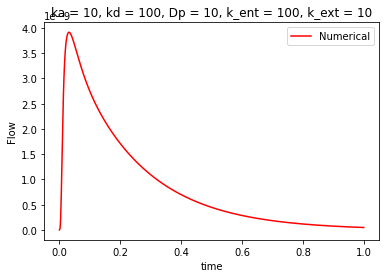

In [23]:
%matplotlib notebook
%matplotlib inline 
print(datf['iterations per step'].sum())
display(datf)
plt.plot(datf['time'],datf['Flow'], 'r-', markersize=4, label = 'Numerical')
# plt.plot(dfex['time'],dfex['Flow']/1e-9, 'b-', markersize=4, label = 'Analytical')
# plt.plot(datmat['time'],datmat['Flow'], 'g-', markersize=4, label = 'Transfer Matrix')
plt.title("ka = "+str(round(pars[0],4)) + ", kd = " + str(round(pars[1],4)) +
         ", Dp = "+str(round(pars[2],4)) + ", k_ent = "+str(round(pars[3],4))
          + ", k_ext = "+str(round(pars[4],4)))
plt.legend()
# plt.xlim(0,4)
plt.xlabel('time')
plt.ylabel('Flow')
plt.show()

In [ ]:
%mprun -f eq.solver eq.solver(CI, a, f, T, CpI, opts=opts, pars=pars, user_action=None)

In [ ]:
datf = eq.pulse(Diffs, pars=pars, opts=opts, T=1, a=1000, Nx=1000,  save_plot=False, show_plot=False, pore_plot=True)

In [ ]:
%matplotlib notebook
%matplotlib inline 
plt.plot(datf['time'],datf['Flow']/1e-9, 'r-', markersize=4)
plt.plot(t, y, 'b-', markersize=4, label = 'Matrix')
plt.xlim(0,1)
plt.xlabel('time')
plt.ylabel('Flow')
plt.show()

In [ ]:
ka = np.exp(10)
kd = np.exp(12)
pars=[ka, kd]

In [ ]:
datf = adl.pulse(Diffs, pars=pars, opts=opts, T=1, dt=0.0001, Nx=1000,  save_plot=False, show_plot=False)

In [ ]:
datmat = pt.pulse(Diffs, pars=pars, opts=opts, model = 'rev_ads', T=1, dt=0.0001, Nx=1000)

In [ ]:
%matplotlib notebook
%matplotlib inline 
plt.plot(datf['time'],datf['Flow']/1e-9, 'r-', markersize=4, label = 'Numerical')
plt.plot(datmat['time'],datmat['Flow'], 'b-', markersize=4, label = 'Matrix')
plt.xlim(0,1)
plt.xlabel('time')
plt.ylabel('Flow')
plt.show()

In [ ]:
datf = mad.pulse(Diffs, pars=pars, opts=opts, T=1, a=1000, Nx=1000,  save_plot=False, show_plot=False, pore_plot=False)

In [2]:
import models.Ansol_dless as andl
import numpy as np
# pars = [1000, 100, 0, 0, 0, 0, 1e-3]
pars1 = [10**(-5), 1]
pars = [1e3, 1e3, 1e-3]
pars2 = [10**5, (10**6), (10**6), (10**5), 10**(5), 10**(4), 10**(-2)]


opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
opts = [1.75e-6/2/5.5, 2*1e-9]

# DA = andl.pulse(pars=pars, opts=opts, model='analytical_DAMP', T=4, dt=0.004, Nx=1000,
#                  inversion = 'ILap')
# Eq = andl.pulse(pars=pars1, opts=opts1, model='analytical_EqMP', T=4, dt=0.01, Nx=1000,
#                  inversion = 'ifft')
DA = andl.pulse(pars=pars2, opts=opts1, model='analytical_7P', T=10, dt=0.01, Nx=1000,
                 inversion = 'ILap')

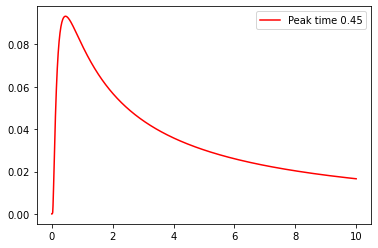

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
# peaktime = Eq[0][np.argmax(Eq[1])]
# lbl="Peak time " + str(peaktime)
# Eq[1][Eq[1]<0] = 0
# # plt.plot(Eq[0], Eq[1], 'b-', label = lbl)
peaktime = DA[0][np.argmax(DA[1])]
lbl="Peak time " + str(peaktime)
DA[1][DA[1]<0] = 0
plt.plot(DA[0], DA[1], 'r-', label = lbl)

# # plt.plot(dLap[0], dLap[1], 'b-', label = 'InLap')

# peaktime = DA[0][np.argmax(DA[1])]
# lbl="Peak time " + str(peaktime)
# plt.plot(DA[0], DA[1], 'r-', label = lbl)
# plt.plot(sim_data_num['time'], sim_data_num['Flow']/1e-9, 'r-', label = 'Numerical sim pulse')
plt.legend()
# plt.xlim(0, 4)
plt.show()

In [6]:
import models.regress as rgr

prs = rgr.regress_an(DA[1], DA[0], opts=opts1, model = 'analytical_7P', 
                     Nx=1000, step = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], init_guess = None)

In [167]:
print(np.power(10,prs))
# pars = [1e2, 1e2, 1e6, 1e6, 0, 0, 1e-3]
# opts1 = [35793650.79*1.75e-6/2]
sev = andl.pulse(pars=np.power(10,  prs), opts=opts1, model='analytical_7P', T=10, dt=0.01, Nx=1000,
                 inversion = 'ILap')

[1.84467822 0.01087521]


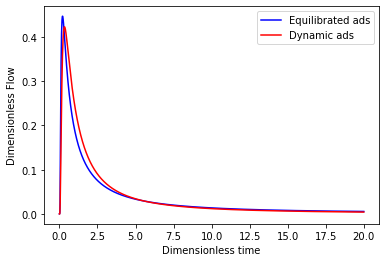

In [168]:
%matplotlib notebook
%matplotlib inline
peaktime = sev[0][np.argmax(sev[1])]
lbl="Peak time " + str(peaktime)
plt.plot(sev[0], sev[1], 'b-', label = 'Equilibrated ads')

# plt.plot(dLap[0], dLap[1], 'b-', label = 'InLap')

peaktime = DA[0][np.argmax(DA[1])]
lbl="Peak time " + str(peaktime)
plt.plot(DA[0], DA[1], 'r-', label = 'Dynamic ads')
# plt.plot(sim_data_num['time'], sim_data_num['Flow']/1e-9, 'r-', label = 'Numerical sim pulse')
plt.legend()
plt.xlabel('Dimensionless time')
plt.ylabel('Dimensionless Flow')
# plt.xlim(0, 4)
plt.show()

In [81]:
import models.regress as rgr
opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
prs = rgr.regress_an(DA[1], DA[0], opts=opts1, model = 'analytical_EqMP', 
                     Nx=1000, step = [0.1, 0.1], init_guess = None)

In [86]:
print(np.power(10, prs))
# pars = [1e5, 1e6, 1e6, 1e6, 0, 0, 1]
# opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
# # pars =[10**(-1), 10**2]
Eq = andl.pulse(pars=np.power(10, prs), opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000,
                 inversion = 'ILap')

[7.70821632e-02 1.00000000e-10]


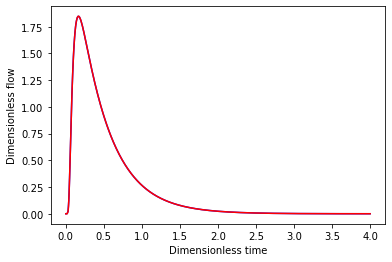

In [87]:
%matplotlib notebook
%matplotlib inline
peaktime = sev[0][np.argmax(sev[1])]
lbl="Peak time " + str(peaktime)
plt.plot(DA[0], DA[1], 'b-', label = '7P model')

# plt.plot(dLap[0], dLap[1], 'b-', label = 'InLap')

peaktime = Eq[0][np.argmax(Eq[1])]
lbl="Peak time " + str(peaktime)
plt.plot(Eq[0], Eq[1], 'r-', label = 'EqAd model')
# plt.plot(sim_data_num['time'], sim_data_num['Flow']/1e-9, 'r-', label = 'Numerical sim pulse')
# plt.legend()
# plt.xlim(0, 4)
plt.ylabel('Dimensionless flow')
plt.xlabel('Dimensionless time')
plt.show()

In [3]:
import pandas as pd
pd.read_csv('saved/1ZEqMP_sensitivity_log_m5p5.csv', skiprows = None)

,Unnamed: 0,-4.9,-4.8,-4.7,-4.6,-4.5,-4.4,-4.3,-4.2,-4.1,...,4.0,4.1,4.200000000000001,4.300000000000001,4.4,4.5,4.600000000000001,4.700000000000001,4.800000000000001,4.9
0,-4.9,1.540126e-03,1.652236e-03,1.777307e-03,2.073874e-03,2.310714e-03,2.526997e-03,2.714340e-03,2.770532e-03,2.714330e-03,...,6.437794e-02,6.431816e-02,6.429176e-02,6.430872e-02,6.430037e-02,6.427267e-02,6.422828e-02,6.422150e-02,6.422133e-02,6.418368e-02
1,-4.8,1.777307e-03,2.073874e-03,2.310714e-03,2.526997e-03,2.714340e-03,2.770532e-03,2.714330e-03,3.036975e-03,3.021992e-03,...,8.110182e-02,8.107861e-02,8.107414e-02,8.109564e-02,8.111396e-02,8.110052e-02,8.107990e-02,8.106085e-02,8.105346e-02,8.107273e-02
2,-4.7,2.310714e-03,2.526997e-03,2.714340e-03,2.770532e-03,2.714330e-03,3.036975e-03,3.021992e-03,2.921181e-03,3.189069e-03,...,1.020545e-01,1.020300e-01,1.020350e-01,1.020412e-01,1.020662e-01,1.020607e-01,1.020977e-01,1.021190e-01,1.020912e-01,1.020754e-01
3,-4.6,2.714340e-03,2.770532e-03,2.714330e-03,3.036975e-03,3.021992e-03,2.921181e-03,3.189069e-03,3.296048e-03,3.327164e-03,...,1.282600e-01,1.282336e-01,1.282628e-01,1.282821e-01,1.282399e-01,1.281935e-01,1.282006e-01,1.281717e-01,1.281413e-01,1.281199e-01
4,-4.5,2.714330e-03,3.036975e-03,3.021992e-03,2.921181e-03,3.189069e-03,3.296048e-03,3.327164e-03,3.748207e-03,3.966812e-03,...,1.614758e-01,1.614414e-01,1.613885e-01,1.613345e-01,1.613326e-01,1.613349e-01,1.612996e-01,1.612575e-01,1.612579e-01,1.612629e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4.5,5.206502e-14,5.403610e-15,1.929389e-15,4.191579e-16,5.491962e-17,4.931184e-18,3.138524e-19,1.419721e-20,4.525741e-22,...,2.880228e-137,2.897914e-137,2.911819e-137,2.923509e-137,2.933370e-137,2.940462e-137,2.945495e-137,2.949813e-137,2.953746e-137,2.957311e-137
95,4.6,1.929395e-15,4.191584e-16,5.491970e-17,4.931179e-18,3.138524e-19,1.419720e-20,4.525738e-22,1.026785e-23,1.725935e-25,...,8.567430e-154,8.632344e-154,8.670244e-154,8.713865e-154,8.740835e-154,8.763128e-154,8.780626e-154,8.794805e-154,8.804944e-154,8.816911e-154
96,4.7,5.491958e-17,4.931189e-18,3.138526e-19,1.419718e-20,4.525732e-22,1.026786e-23,1.725941e-25,1.749451e-27,1.382153e-29,...,3.111379e-172,3.131635e-172,3.150777e-172,3.164202e-172,3.172896e-172,3.183982e-172,3.189807e-172,3.196352e-172,3.199817e-172,3.203662e-172
97,4.8,3.138522e-19,1.419721e-20,4.525734e-22,1.026784e-23,1.725938e-25,1.749544e-27,1.382289e-29,3.561702e-31,1.840528e-32,...,4.389034e-193,4.410806e-193,4.432398e-193,4.443830e-193,4.456174e-193,4.468766e-193,4.475078e-193,4.484496e-193,4.486066e-193,4.488800e-193


In [8]:
KH_lim = [10, -10]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
KH_sim

array([ 10. ,   9.8,   9.6,   9.4,   9.2,   9. ,   8.8,   8.6,   8.4,
         8.2,   8. ,   7.8,   7.6,   7.4,   7.2,   7. ,   6.8,   6.6,
         6.4,   6.2,   6. ,   5.8,   5.6,   5.4,   5.2,   5. ,   4.8,
         4.6,   4.4,   4.2,   4. ,   3.8,   3.6,   3.4,   3.2,   3. ,
         2.8,   2.6,   2.4,   2.2,   2. ,   1.8,   1.6,   1.4,   1.2,
         1. ,   0.8,   0.6,   0.4,   0.2,   0. ,  -0.2,  -0.4,  -0.6,
        -0.8,  -1. ,  -1.2,  -1.4,  -1.6,  -1.8,  -2. ,  -2.2,  -2.4,
        -2.6,  -2.8,  -3. ,  -3.2,  -3.4,  -3.6,  -3.8,  -4. ,  -4.2,
        -4.4,  -4.6,  -4.8,  -5. ,  -5.2,  -5.4,  -5.6,  -5.8,  -6. ,
        -6.2,  -6.4,  -6.6,  -6.8,  -7. ,  -7.2,  -7.4,  -7.6,  -7.8,
        -8. ,  -8.2,  -8.4,  -8.6,  -8.8,  -9. ,  -9.2,  -9.4,  -9.6,
        -9.8, -10. ])